In [71]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from sklearn import datasets, linear_model


# The plots in shape of US map 

In [35]:
def merge_Ind_Col(dataframe):
    '''
    Our data frame we read has many index columns and many headers and ti readh a data, a tuple required to reach it and this function merges and decrease the headder and index to one
    :param:dataframe: pandas.dataframe
    :return: rtn:  pandas.dataframe
    '''
    Update_col_names=[]
    for col in dataframe.columns:
        Update_col_names.append(' '.join(col))
    Update_index_names=[]
    for ind in dataframe.index:
        Update_index_names.append(' '.join(ind))
    b=dataframe.values[:,:]
    rtn=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
    return rtn

In [36]:
# The dataframe names describes the table 
census_data_table_4a=pd.read_excel('table04a.xlsx',skiprows=4,skipfooter= 7,header=[0, 1],index_col=[0]).fillna(method='ffill')
census_data_table_4a.name='Table 4a Reported Voting and Registration, by Sex, Race and Hispanic Origin, for States'
census_data_table_4a=merge_Ind_Col(census_data_table_4a)
census_data_table_4a.head()

c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Total population Unnamed: 1_level_1,Total citizen population Unnamed: 2_level_1,Registered Total registered,Registered Percent registered\n(Total),Registered Margin of error 1,Registered Percent registered\n(Citizen),Registered Margin of error 1.1,Voted Total voted,Voted Percent voted\n(Total),Voted Margin of error 1,Voted Percent voted\n(Citizen),Voted Margin of error 1.1
U N I T E D S T A T E S,252274.0,231593.0,168308.0,66.7,0.4,72.7,0.4,154628.0,61.3,0.4,66.8,0.4
A L A B A M A,3769.0,3716.0,2527.0,67.0,3.1,68.0,3.1,2247.0,59.6,3.3,60.5,3.3
A L A S K A,528.0,516.0,383.0,72.6,3.2,74.2,3.1,330.0,62.4,3.4,63.8,3.4
A R I Z O N A,5638.0,5075.0,3878.0,68.8,2.5,76.4,2.5,3649.0,64.7,2.6,71.9,2.6
A R K A N S A S,2283.0,2195.0,1361.0,59.6,3.4,62.0,3.4,1186.0,51.9,3.4,54.0,3.5


In [37]:
census_data_table_4c=pd.read_excel('table04c.xlsx',skiprows=4,skipfooter= 8,header=[0, 1],index_col=[0,1]).fillna(method='ffill')
census_data_table_4c.name='Table 4c Reported Voting and Registration, by Age, for States'
census_data_table_4c=merge_Ind_Col(census_data_table_4c)
census_data_table_4c.head()

c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Total population Unnamed: 2_level_1,Total citizen population Unnamed: 3_level_1,Registered Total registered,Registered Percent registered\n(Total),Registered Margin of error 1,Registered Percent registered\n(Citizen),Registered Margin of error 1.1,Voted Total voted,Voted Percent voted\n(Total),Voted Margin of error 1,Voted Percent voted\n(Citizen),Voted Margin of error 1.1
US Total,252274,231593,168308,66.7,0.4,72.7,0.4,154628,61.3,0.4,66.8,0.4
US 18 to 24,28659,26737,15984,55.8,1.1,59.8,1.1,13752,48,1.1,51.4,1.2
US 25 to 34,44871,39962,27351,61,0.9,68.4,0.9,24091,53.7,0.9,60.3,0.9
US 35 to 44,41558,35977,25852,62.2,0.9,71.9,0.9,23421,56.4,0.9,65.1,1
US 45 to 64,81912,75590,57226,69.9,0.6,75.7,0.6,53646,65.5,0.6,71,0.6


In [38]:
# This part to create map shape 
path = "..\\tl_2022_us_state\\tl_2022_us_state.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")
# To remove non-continental states 
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]
reg_per=list(census_data_table_4a['Registered Percent registered\n(Citizen)'])
total_cit=list(census_data_table_4a['Total citizen population Unnamed: 2_level_1'])
voted_per=list(census_data_table_4a['Voted Percent voted\n(Citizen)'])
# we also removed non continental states 
reg_per=[varx[1] for varx in enumerate(reg_per) if varx[0] not in [0,2,12]]
total_cit=[varx[1] for varx in enumerate(total_cit) if varx[0] not in [0,2,12]]
voted_per=[varx[1] for varx in enumerate(voted_per) if varx[0] not in [0,2,12]]
cmap='inferno'
plt.rcParams.update({'font.size': 22})
# Creating new data frame and it help us to plot map easily 
new_us=us49.sort_values(by=['NAME'])
new_us['reg_per']=reg_per
new_us['Total_cit']=total_cit
new_us['voted_per']=voted_per
new_us['Reg_but_no_vote']=[i-j for i,j in zip(reg_per,voted_per)]

C:\Users\mbagci\AppData\Local\Temp\ipykernel_5820\3267372005.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(new_us.sort_values(by='Reg_but_no_vote')["NAME"][:3])
C:\Users\mbagci\AppData\Local\Temp\ipykernel_5820\3267372005.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(new_us.sort_values(by='Reg_but_no_vote')["Reg_but_no_vote"][:3])
C:\Users\mbagci\AppData\Local\Temp\ipykernel_5820\3267372005.py:13: FutureWarning: The behavior of `series[i:j]` with an inte

53    District of Columbia
15               Wisconsin
19              Washington
Name: NAME, dtype: object
53    2.9
15    3.1
19    3.3
Name: Reg_but_no_vote, dtype: float64
44      Mississippi
32     North Dakota
0     West Virginia
Name: NAME, dtype: object
44    10.1
32    10.2
0     11.2
Name: Reg_but_no_vote, dtype: float64


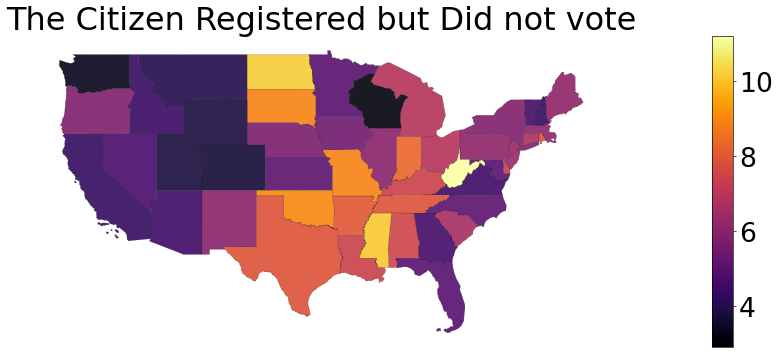

In [78]:
# Plot section 
f,ax = plt.subplots(1,1, figsize=(15,10),     sharex=True, sharey=True, dpi=60)
f.tight_layout()
plt.title('The Citizen Registered but Did not vote')
ax.set_axis_off()
plt.rcParams.update({'font.size': 32})

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5,alpha=0.5)
new_us.plot('Reg_but_no_vote', alpha=0.9, ax=ax , cmap=cmap, edgecolor='k', legend=True, cax=cax,  linewidth=0.2)
# I did the plot but also need the sates and the voting rate so I pront them 
print(new_us.sort_values(by='Reg_but_no_vote')["NAME"][:3])
print(new_us.sort_values(by='Reg_but_no_vote')["Reg_but_no_vote"][:3])
print(new_us.sort_values(by='Reg_but_no_vote')["NAME"][-3:])
print(new_us.sort_values(by='Reg_but_no_vote')["Reg_but_no_vote"][-3:])


Index(['W Y O M I N G', 'V E R M O N T', 'A L A S K A',
       'D I S T R I C T   O F   C O L U M B I A'],
      dtype='object')
                                         Total population Unnamed: 1_level_1  \
W Y O M I N G                                                          436.0   
V E R M O N T                                                          507.0   
A L A S K A                                                            528.0   
D I S T R I C T   O F   C O L U M B I A                                576.0   
N O R T H   D A K O T A                                                571.0   
S O U T H   D A K O T A                                                659.0   
D E L A W A R E                                                        766.0   
R H O D E   I S L A N D                                                840.0   
M O N T A N A                                                          836.0   
H A W A I I                                                           1

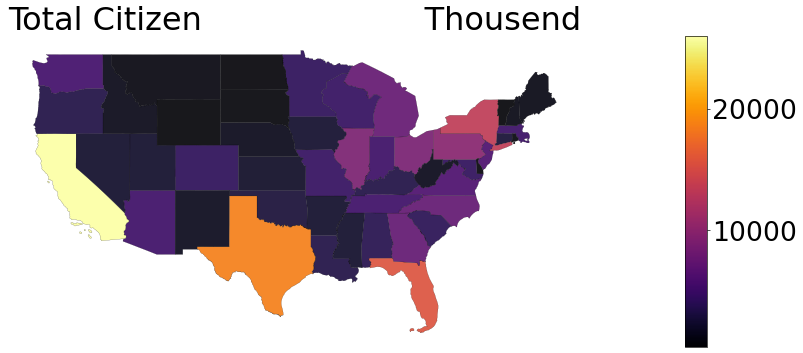

In [41]:
f,ax = plt.subplots(1,1, figsize=(15,10),     sharex=True, sharey=True, dpi=60)
f.tight_layout()
plt.title('Total Citizen                      Thousend')
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5,alpha=0.5)
new_us.plot('Total_cit', alpha=0.9, ax=ax , cmap=cmap, edgecolor='k', legend=True, cax=cax,  linewidth=0.2)
# print(census_data_table_4a.sort_values(by='Total citizen population Unnamed: 2_level_1').index[:4])
# print(census_data_table_4a.sort_values(by='Total citizen population Unnamed: 2_level_1'))
# print(census_data_table_4a.sort_values(by='Total citizen population Unnamed: 2_level_1').index[-4:])
# print(census_data_table_4a.sort_values(by='Total citizen population Unnamed: 2_level_1'))

Index(['A R K A N S A S', 'T E X A S', 'W E S T   V I R G I N I A'], dtype='object')
Index(['M O N T A N A', 'M I N N E S O T A',
       'D I S T R I C T   O F   C O L U M B I A'],
      dtype='object')


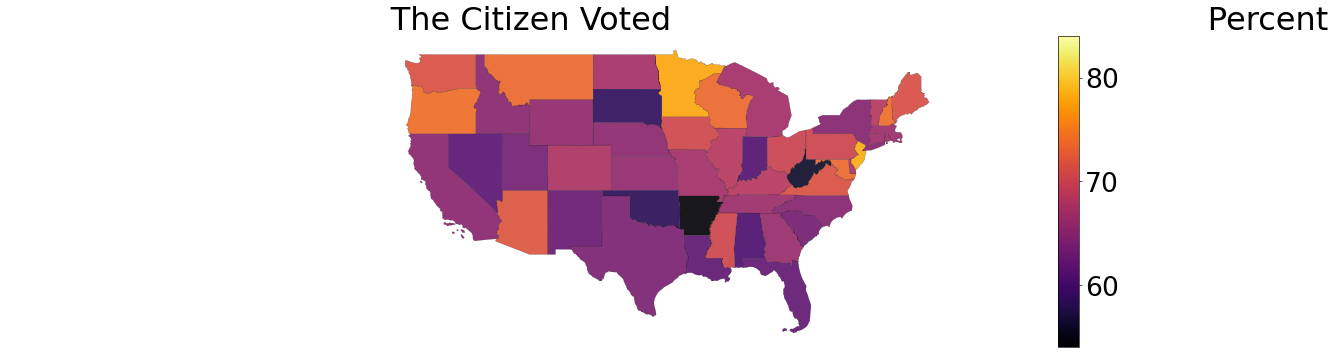

In [42]:
# This part used in the presentation 
f,ax = plt.subplots(1,1, figsize=(15,10),    sharex=True, sharey=True, dpi=60)
f.tight_layout()
plt.title('                                      The Citizen Voted                                                     Percent')
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5,alpha=0.5)
new_us.plot('voted_per', alpha=0.9, ax=ax , cmap=cmap, edgecolor='k', legend=True, cax=cax,  linewidth=0.2)
print(census_data_table_4a.sort_values(by='Voted Percent voted\n(Total)').index[:3])
print(census_data_table_4a.sort_values(by='Voted Percent voted\n(Total)').index[-3:])

C:\Users\mbagci\AppData\Local\Temp\ipykernel_5820\3603239279.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(new_us.sort_values(by='slopes')["NAME"][:3])
C:\Users\mbagci\AppData\Local\Temp\ipykernel_5820\3603239279.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(new_us.sort_values(by='slopes')["slopes"][:3])
C:\Users\mbagci\AppData\Local\Temp\ipykernel_5820\3603239279.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecat

53    District of Columbia
9                  Vermont
22                 Alabama
Name: NAME, dtype: object
53   -0.157116
9     0.068112
22    0.079812
Name: slopes, dtype: float64
54        Iowa
4     Maryland
37       Maine
Name: NAME, dtype: object
54    0.210417
4     0.265833
37    0.276376
Name: slopes, dtype: float64


<AxesSubplot:title={'center':"Reduction of Yougth's interest to Elections"}>

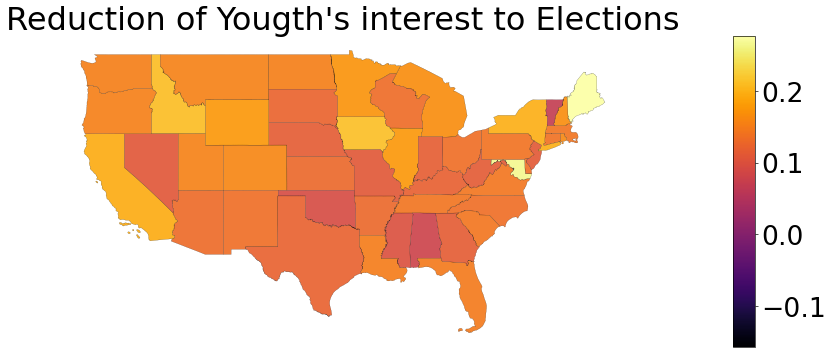

In [43]:
# state_name=[]
# coefs=[0,0,0,1]
# count=-1
# slope=[]
# for ind,data in census_data_table_4c['Voted Percent voted\n(Total)'].items():
#     count=(count+1)%6
#     if count>0:
#         if data!='B':
#             coefs.append(data)
        
#     elif count==0:

#         slop,intercept, r, p, se =stats.linregress(coefs,list(range(len(coefs))))
        
#         slope.append(slop)
#         state_name.append(ind.split(' ')[0])
#         coefs=[]
# slop,intercept, r, p, se =stats.linregress(coefs,list(range(len(coefs))))
# if len(coefs)<3:
#     slop=np.mean(slope)
# slope.append(slop)


# slope=[varx[1] for varx in enumerate(slope) if varx[0] not in [0,1,2,12]]
# new_us['slopes']=slope
# print(new_us.sort_values(by='slopes')["NAME"][:3])
# print(new_us.sort_values(by='slopes')["slopes"][:3])
# print(new_us.sort_values(by='slopes')["NAME"][-3:])
# print(new_us.sort_values(by='slopes')["slopes"][-3:])
# f,ax = plt.subplots(1,1, figsize=(15,10),     sharex=True, sharey=True, dpi=60)
# f.tight_layout()
# plt.title("Reduction of Yougth's interest to Elections")
# ax.set_axis_off()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="3%", pad=0.5,alpha=0.5)
# new_us.plot('slopes', alpha=0.9, ax=ax , cmap=cmap, edgecolor='k', legend=True, cax=cax,  linewidth=0.2)

# DC state sometimes neglected becasue it is changig the scale too much but representing alittle 

<AxesSubplot:title={'center':'Party Vote Difference in Presidential Elections 2020'}>

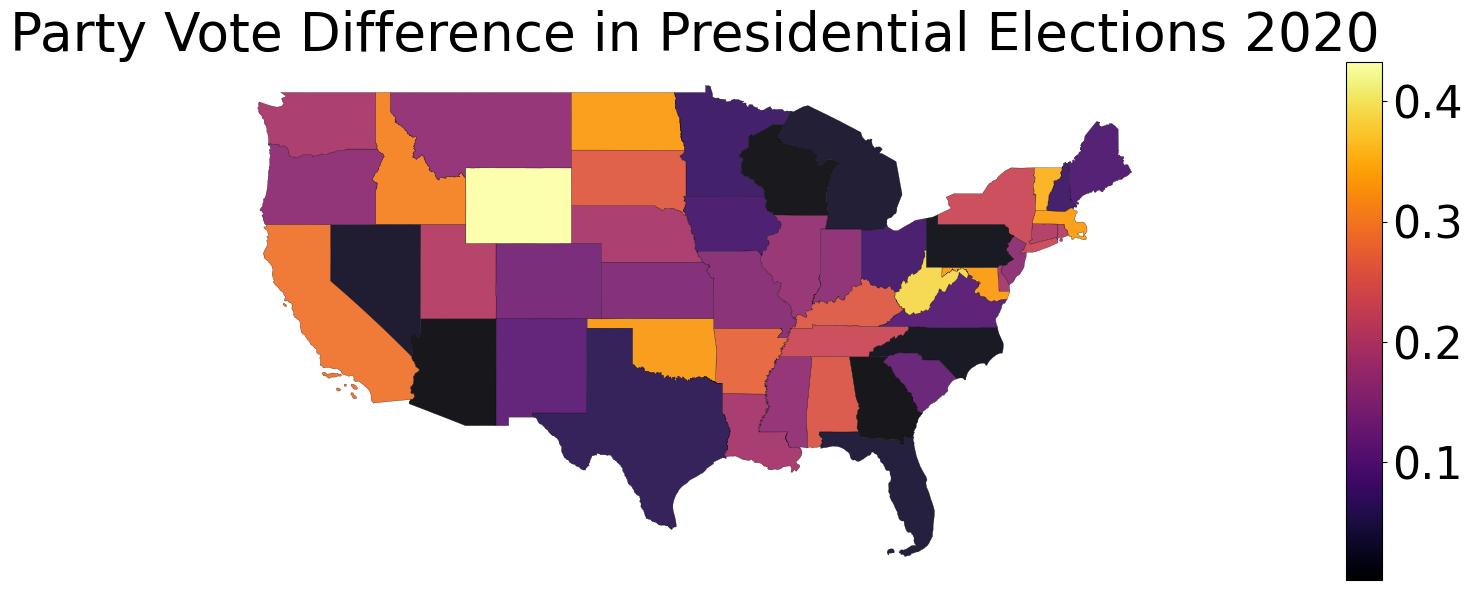

In [62]:
election_resul=pd.read_csv('Popular vote backend - Sheet1.csv')
diff=abs(election_resul.sort_values(by='state')['rep_percent']-election_resul.sort_values(by='state')['dem_percent'])
diff[19]=np.mean(diff)
new_us['Diff_in_elec']=diff.values
f,ax = plt.subplots(1, 1, figsize=(15,10), sharex=True, sharey=True, dpi=60)
f.tight_layout()
plt.title("Party Vote Difference in Presidential Elections 2020")
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5,alpha=0.5)
new_us.plot('Diff_in_elec', alpha=0.9, ax=ax , cmap=cmap, edgecolor='k', legend=True, cax=cax,  linewidth=0.2)

In [45]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [75]:
print(pearsonr(new_us['Diff_in_elec'],new_us['voted_per']))
print(spearmanr(new_us['Diff_in_elec'],new_us['voted_per']))

(-0.2896266919192506, 0.04353496459389473)
SpearmanrResult(correlation=-0.27420013410133637, pvalue=0.05657616227398514)


<AxesSubplot:title={'center':'Party Vote Difference in Presidential Elections 2016'}>

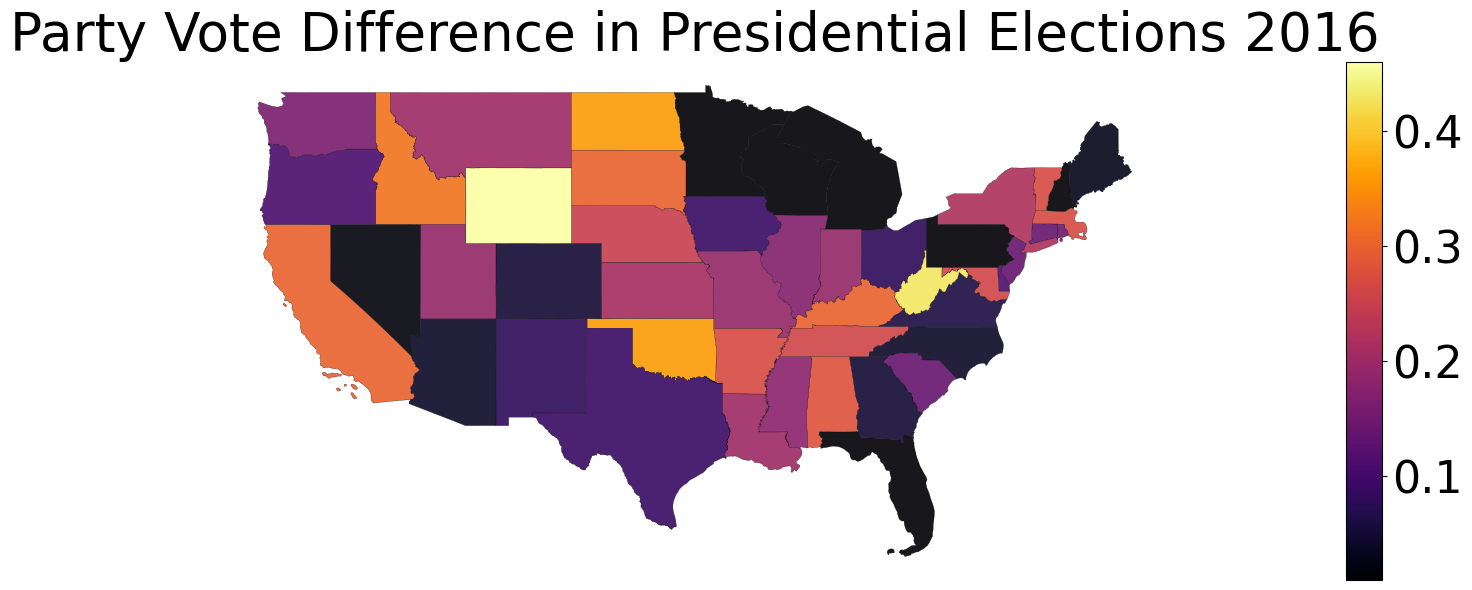

In [63]:
election_resul_2016=pd.read_csv('federalelections2016.csv')
diff_2016=abs(election_resul_2016['CLINTON']-election_resul_2016['TRUMP'])
diff_2016[8]=np.mean(diff_2016)
dif_2016=[varx[1] for varx in enumerate(diff_2016) if varx[0] not in [1,11,52,51]]
new_us['Diff_in_elec_2016']=dif_2016
f,ax = plt.subplots(1,1, figsize=(15,10),     sharex=True, sharey=True, dpi=60)
f.tight_layout()
plt.title("Party Vote Difference in Presidential Elections 2016")
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5,alpha=0.5)
new_us.plot('Diff_in_elec_2016', alpha=0.9, ax=ax , cmap=cmap, edgecolor='k', legend=True, cax=cax,  linewidth=0.2)

In [76]:
print(pearsonr(new_us['Diff_in_elec_2016'],new_us['voted_per']))
print(spearmanr(new_us['Diff_in_elec_2016'],new_us['voted_per']))

(-0.3931642096182249, 0.005196131813014212)
SpearmanrResult(correlation=-0.39772269345728795, pvalue=0.004655382889552426)


In [223]:
gencoy=census_data_table_4c['Voted Percent voted\n(Citizen)'].values[:][::6]
gencoy[gencoy == "B"] = 70.4
gencoy=[varx[1] for varx in enumerate(gencoy) if varx[0] not in [0,2,12]]

print(len(gencoy))
# diff=abs(election_resul.sort_values(by='state')['rep_percent']-election_resul.sort_values(by='state')['dem_percent'])
diff=new_us['Diff_in_elec_2016']
len(diff)
pearsonr(gencoy,diff)

49


(-0.3931642096182249, 0.005196131813014212)

<Figure size 720x720 with 0 Axes>

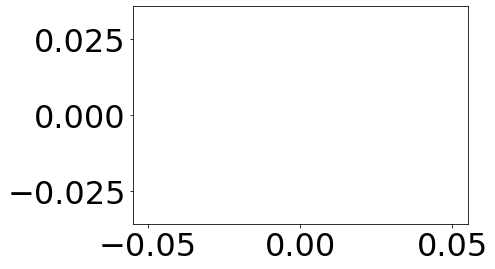

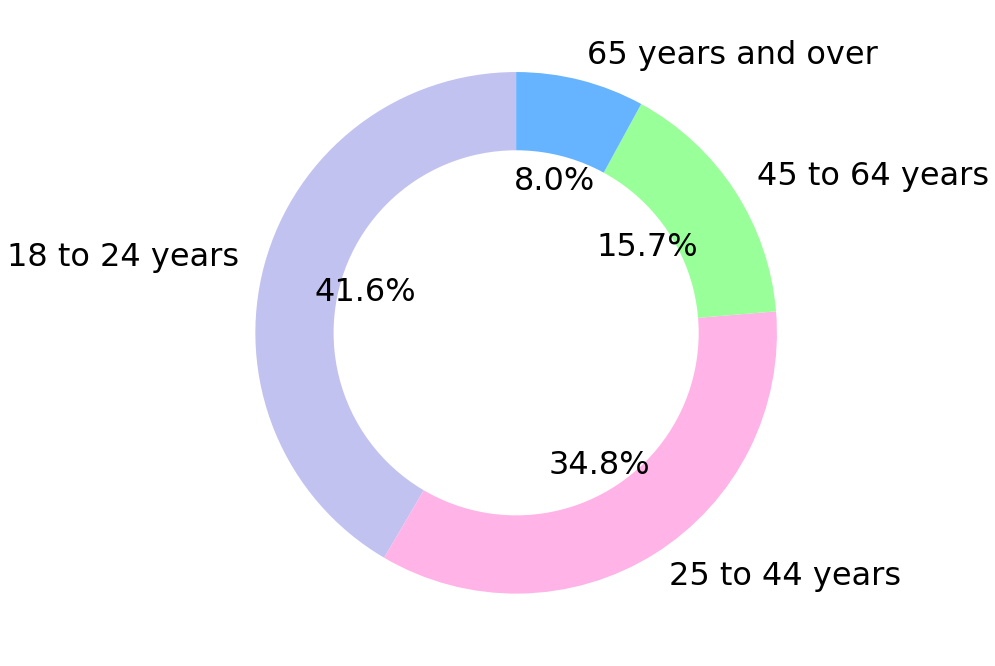

In [152]:
# The pia chart for internet usage 
fig1, ax1 = plt.subplots()
plt.figure(figsize=[14,14])

labels = ["18 to 24 years","25 to 44 years",'45 to 64 years','65 years and over']
sizes = np.array([21.4,17.9,8.1,4.1])
#colors
colors = ['#c2c2f0','#ffb3e6', '#99ff99', '#66b3ff']
#explsion
explode = (0.1,0.1,0.1,0.1)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Correlatin With Competitiveness')

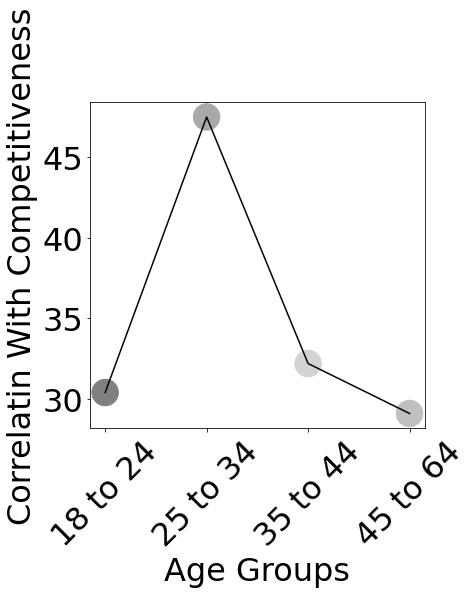

In [222]:

# interes_data=np.array([30.4,47.5,32.2,29.1])
# interes_label=["18 to 24","25 to 34",'35 to 44',"45 to 64"]
# plt.figure(figsize=[6,6])
# plt.plot(interes_data,c='black')

# plt.scatter(interes_label,interes_data,s=700,c=['grey','darkgrey','lightgrey','silver'])
# plt.xticks(rotation = 45) 

# # plt.xticks(labels=interes_label)
# plt.xlabel('Age Groups')
# plt.ylabel("Correlatin With Competitiveness")